In [2]:
pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 68 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 838 kB/s eta 0:00:01
     |████████████████████████████████| 174 kB 4.4 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install os

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tamber/steam-video-games")

print("Path to dataset files:", path)

Path to dataset files: /Users/annatran/.cache/kagglehub/datasets/tamber/steam-video-games/versions/3


In [27]:
path = "/Users/annatran/Downloads/steam-200k.csv"   # your dataset path
steam_data = pd.read_csv(path)
print(steam_data)

        151603712  The Elder Scrolls V Skyrim  purchase    1.0  0
0       151603712  The Elder Scrolls V Skyrim      play  273.0  0
1       151603712                   Fallout 4  purchase    1.0  0
2       151603712                   Fallout 4      play   87.0  0
3       151603712                       Spore  purchase    1.0  0
4       151603712                       Spore      play   14.9  0
...           ...                         ...       ...    ... ..
199994  128470551                 Titan Souls      play    1.5  0
199995  128470551  Grand Theft Auto Vice City  purchase    1.0  0
199996  128470551  Grand Theft Auto Vice City      play    1.5  0
199997  128470551                        RUSH  purchase    1.0  0
199998  128470551                        RUSH      play    1.4  0

[199999 rows x 5 columns]


In [16]:
steam_play = steam_data[steam_data["purchase"] == "play"]


In [ ]:
# Create rating buckets for each row
bins = [0, 3, 6, float("inf")]
labels = ["0_3", "4_6", "7_up"]

steam_play["rating_bucket"] = pd.cut(
    steam_play["1.0"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Count rating buckets per game
game_rating_table = (
    steam_play.groupby("The Elder Scrolls V Skyrim")["rating_bucket"]
    .value_counts()
    .unstack(fill_value=0)
)

# Rename columns for clarity
game_rating_table = game_rating_table.rename(columns={
    "0_3": "ratings_0_3",
    "4_6": "ratings_4_6",
    "7_up": "ratings_7_up"
})

print(game_rating_table.head())

rating_bucket                                       ratings_0_3  ratings_4_6  \
The Elder Scrolls V Skyrim                                                     
007 Legends                                                   1            0   
0RBITALIS                                                     3            0   
1... 2... 3... KICK IT! (Drop That Beat Like an...            3            1   
10 Second Ninja                                               1            1   
10,000,000                                                    0            1   

rating_bucket                                       ratings_7_up  
The Elder Scrolls V Skyrim                                        
007 Legends                                                    0  
0RBITALIS                                                      0  
1... 2... 3... KICK IT! (Drop That Beat Like an...             1  
10 Second Ninja                                                0  
10,000,000                           

/var/folders/r4/tj3pd8f13pq003fm832n9rhr0000gn/T/ipykernel_47080/3111954985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steam_play["rating_bucket"] = pd.cut(


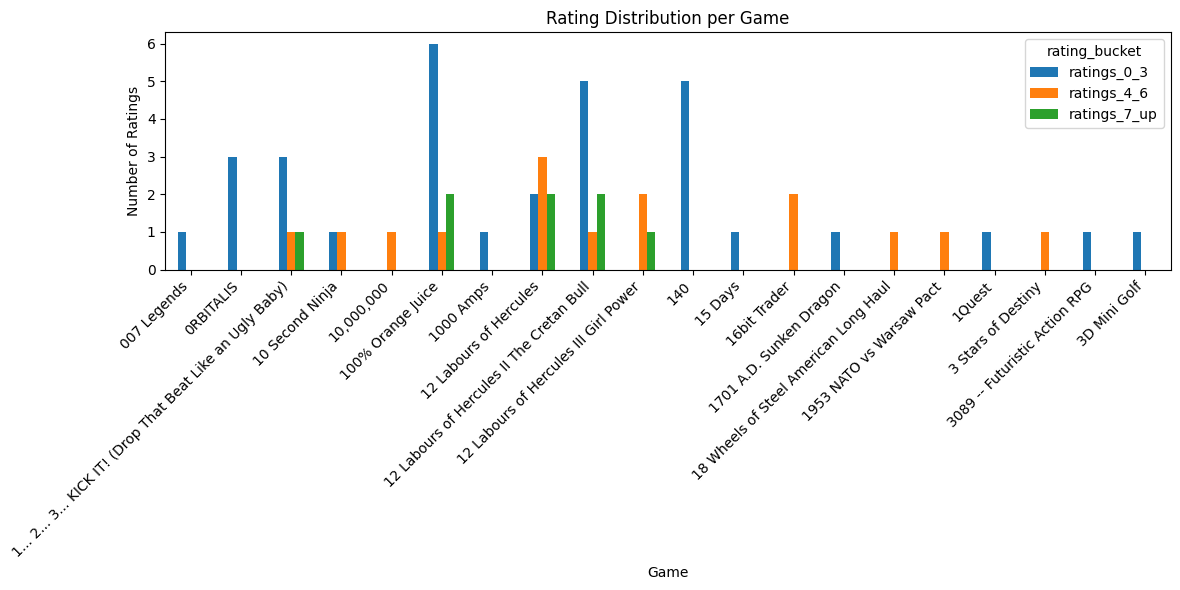

In [ ]:
import matplotlib.pyplot as plt

# game_rating_table is the table created earlier
# it contains:
#   ratings_0_3
#   ratings_4_6
#   ratings_7_up

# Pick how many games to plot (all games can be huge)
subset = game_rating_table.head(20)  # plot first 20 games 

# Plot
subset.plot(kind="bar", figsize=(12, 6))

plt.title("Rating Distribution per Game")
plt.xlabel("Game")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


In [ ]:
steam_data["rating"] = steam_data.groupby("The Elder Scrolls V Skyrim")["1.0"].rank(pct=True) * 10
steam_play = steam_data[steam_data["purchase"] == "play"]
print(steam_play)

        151603712  The Elder Scrolls V Skyrim purchase       1.0  0    rating
0       151603712  The Elder Scrolls V Skyrim     play  0.809014  0  9.536971
2       151603712                   Fallout 4     play  0.752582  0  8.955224
4       151603712                       Spore     play  0.629281  0  8.960000
6       151603712           Fallout New Vegas     play  0.610542  0  7.259615
8       151603712               Left 4 Dead 2     play  0.580831  0  7.537100
...           ...                         ...      ...       ... ..       ...
199990  128470551                Fallen Earth     play  0.423832  0  9.526627
199992  128470551                 Magic Duels     play  0.411773  0  7.678571
199994  128470551                 Titan Souls     play  0.357122  0  8.888889
199996  128470551  Grand Theft Auto Vice City     play  0.357122  0  9.011858
199998  128470551                        RUSH     play  0.347091  0  8.787879

[70489 rows x 6 columns]


In [36]:
bins = [0, 3, 7, float("inf")]
labels = [1, 2, 3]  # or "low", "medium", "high"

steam_data["rating"] = pd.cut(
    steam_data["rating"],
    bins=bins,
    labels=labels,
    include_lowest=True
)


/var/folders/r4/tj3pd8f13pq003fm832n9rhr0000gn/T/ipykernel_47080/3365740330.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  steam_data.groupby(["The Elder Scrolls V Skyrim", "rating"])


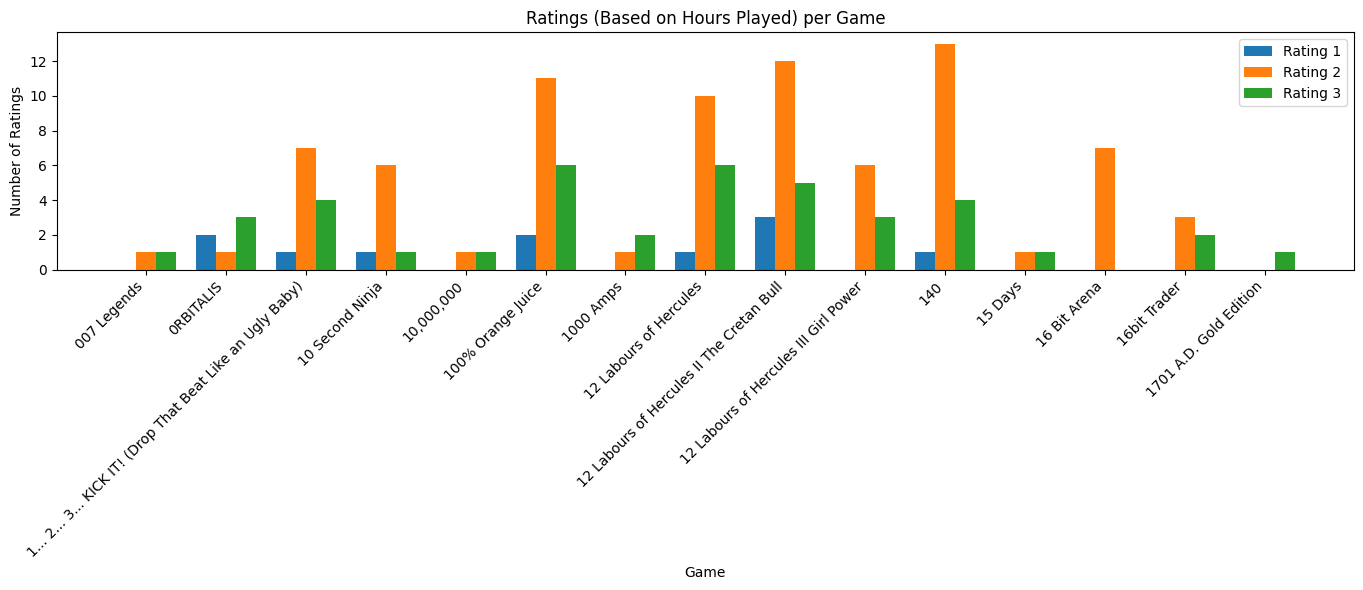

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Count ratings per game per category 
# steam_data["rating"] must already contain 1, 2, 3
rating_table = (
    steam_data.groupby(["The Elder Scrolls V Skyrim", "rating"])
    .size()
    .unstack(fill_value=0)
    .rename(columns={1: "rating_1", 2: "rating_2", 3: "rating_3"})
)

# Select how many games to plot (important!) 
# Otherwise the chart becomes unreadable
subset = rating_table.head(15)   # change as needed

# Plot as a grouped bar chart 
plt.figure(figsize=(14, 6))

x = range(len(subset))
width = 0.25

plt.bar([p - width for p in x], subset["rating_1"], width, label="Rating 1")
plt.bar(x, subset["rating_2"], width, label="Rating 2")
plt.bar([p + width for p in x], subset["rating_3"], width, label="Rating 3")

plt.xticks(x, subset.index, rotation=45, ha="right")
plt.ylabel("Number of Ratings")
plt.xlabel("Game")
plt.title("Ratings (Based on Hours Played) per Game")

plt.legend()
plt.tight_layout()
plt.show()



In [41]:
print(rating_table)

rating                                              rating_1  rating_2  \
The Elder Scrolls V Skyrim                                               
007 Legends                                                0         1   
0RBITALIS                                                  2         1   
1... 2... 3... KICK IT! (Drop That Beat Like an...         1         7   
10 Second Ninja                                            1         6   
10,000,000                                                 0         1   
...                                                      ...       ...   
sZone-Online                                              40       106   
samurai_jazz                                               0         0   
the static speaks my name                                  7         1   
theHunter                                                 69       257   
theHunter Primal                                           1         4   

rating                               